<img src = '../docs/qdart.png' height = '400px'>

- qdas search thì sẽ trả về 1 mạch u nhưng mình sẽ đặt vấn đề là có cần concat mạch u vào mạch cũ hay ko?
- action của policy gradient có thể là 0 hoặc 1, có concat hoặc ko concat
- state s_t của policy gradient là circuit_old, s_t+1 là circuit mới
- nhưng hàm policy pi thì sẽ là 1 neural network pi(s_t) để encode state
- Mỗi state, dqas dùng hàm phân bố p(k=j,a) để chọn layer tạo mạch
- nhưng em xem thì dùng shapeley value có vẻ hiệu quả và phù hợp với context này (vì tham số a của qdas hiện giờ nó ko phụ thuộc vào cấu trúc cổng trong mạch và phụ thuộc loss)
- nên mình có thể tối ưu 2 vòng, 1 vòng tạo mạch u, 1 vòng ráp mạch u vào

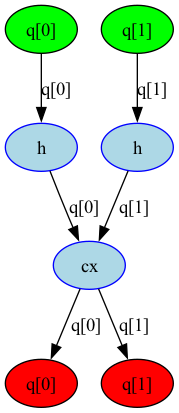

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.circuit.library.standard_gates import CHGate, U2Gate, CXGate
from qiskit.converters import dag_to_circuit

circ = QuantumCircuit(2)
circ.h(0)
circ.h(1)
circ.cx(0, 1)
dag = circuit_to_dag(circ)
(dag.draw('mpl'))

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import numpy as np
import sys
sys.path.insert(0, '..')
import qoop.dag
import qiskit
%load_ext autoreload
%autoreload 2
torch.manual_seed(1000)
torch.cuda.manual_seed(1000)
np.random.seed(1000)
random.seed(1000)

qc = qiskit.QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)
qc.measure_all()
dag = qoop.dag.circuit_to_dag(qc)
node_features = qoop.dag.dag_to_node_features(dag)
adjacency_matrix = qoop.dag.dag_to_adjacency_matrix(dag)

print(node_features)
print(adjacency_matrix)
print(qoop.dag.circuit_to_scalar(qc))
dag.get_node(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[ 7  0]
 [ 7  0]
 [25  0]
 [ 7  0]
 [ 7  0]]
[[0 0 1 1 1]
 [0 0 1 1 1]
 [0 0 0 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]
0.8367290201287971


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pennylane_qiskit/converter.py:227: UserWarning: pennylane_qiskit.converter: The Barrier instruction is not supported by PennyLane, and has not been added to the template.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pennylane_qiskit/converter.py:227: UserWarning: pennylane_qiskit.converter: The Measure instruction is not supported by PennyLane, and has not been added to the template.
  warnings.warn(


In [10]:
dag.get_node(0).op

Hadamard(wires=[0])

In [ ]:
import qoop.qcompilation
import numpy as np
import types
import qiskit
%load_ext autoreload
%autoreload 2

def reward_function(loss):
    return
def frozen_circuit(circuit):
    return

def unfrozen_circuit(frozen_circuit):
    return

def merge_circuit(qc1, qc2):
    return qc1.compose(qc2)

def Qdas(frozen_circuit, pool_theta, pool_operation):
    return
def qdart(initial_circuit, R, T, N):
    # neural_network 
    s = [None] * T
    a = [None] * T
    r = [None] * T
    pi = [None] * T
    policy_gradients = [None] * T
    s[0] = initial_circuit
    for i in range(0, N):
        for t in range(0, T):
            old_circuit = s[t]
            new_circuit = Qdas(frozen_circuit(old_circuit), pool_theta, pool_operation)
            a[t] = qoop.dag.circuit_to_scalar(s[t])
            if a[t] == 0:
                s[t+1] = unfrozen_circuit(old_circuit)
            else:
                s[t+1] = merge_circuit(unfrozen_circuit(old_circuit), new_circuit)
            r[t] = reward_function(loss)
            pi[t] = [s[t], a[t], r[t], s[t+1]]
        # Compute policy gradients
        # policy_gradients[i] = calculate_policy_gradient(pi[t])
    

In [2]:
import qoop.constant
gate_pool = qoop.constant.create_gate_pool(3)
print(gate_pool)

[('Hadamard', 0), ('RX', 0), ('RY', 0), ('RZ', 0), ('Hadamard', 1), ('RX', 1), ('RY', 1), ('RZ', 1), ('Hadamard', 2), ('RX', 2), ('RY', 2), ('RZ', 2), ('CNOT', 0, 1), ('CY', 0, 1), ('CZ', 0, 1), ('CRX', 0, 1), ('CRY', 0, 1), ('CRZ', 0, 1), ('CNOT', 0, 2), ('CY', 0, 2), ('CZ', 0, 2), ('CRX', 0, 2), ('CRY', 0, 2), ('CRZ', 0, 2), ('CNOT', 1, 0), ('CY', 1, 0), ('CZ', 1, 0), ('CRX', 1, 0), ('CRY', 1, 0), ('CRZ', 1, 0), ('CNOT', 1, 2), ('CY', 1, 2), ('CZ', 1, 2), ('CRX', 1, 2), ('CRY', 1, 2), ('CRZ', 1, 2), ('CNOT', 2, 0), ('CY', 2, 0), ('CZ', 2, 0), ('CRX', 2, 0), ('CRY', 2, 0), ('CRZ', 2, 0), ('CNOT', 2, 1), ('CY', 2, 1), ('CZ', 2, 1), ('CRX', 2, 1), ('CRY', 2, 1), ('CRZ', 2, 1)]


----------new epoch 0-----------
batched average loss:  1.0  batched loss std:  0.0 
new baseline:  1.0
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
----------new epoch 1-----------
batched average loss:  1.0  batched loss std:  0.0 
new baseline:  1.0
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
----------new epoch 2-----------
batched average loss:  1.0  batched loss std:  0.0 
new baseline:  1.0
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
----------new epoch 3-----------
batched average loss:  1.0  batched loss std:  0.0 
new baseline:  1.0
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
----------new epoch 4-----------
batched average loss:  1.0  batched loss std:  0.0 
new baseline:  1.0
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
('Hadamard', 0)
<QNode: wires=3, device='default.qubit.tf', interface='tf', diff_method='backpro

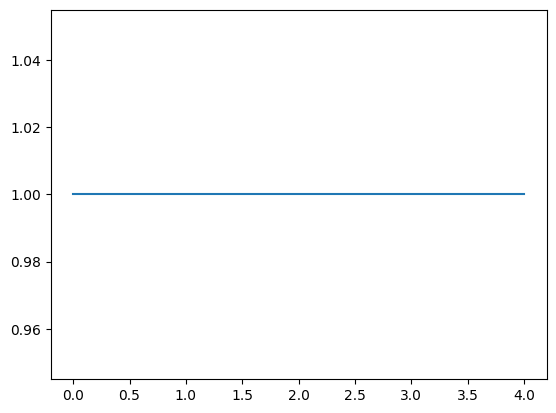

In [4]:

from qdas.DQASsearch import DQAS_search
from qdas.utils import set_op_pool
from qdas.vag import GHZ_vag 
from pennylane import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

ghz_pool = qoop.constant.create_gate_pool(3)
set_op_pool(ghz_pool)
len_pool = len(ghz_pool)
num_operation = 5

stp, nnp, history, circuit = DQAS_search(
    GHZ_vag,
    nq=3,
    p=num_operation,
    batch=1,
    epochs=5,
    verbose=False,
    nnp_initial_value=np.zeros([num_operation, len_pool]),
    structure_opt=tf.keras.optimizers.Adam(learning_rate=0.15),
)
plt.plot(history)
print(circuit)